#AUTOML


# Abstract

Employ PyCaret library to Automate machine learning models.
Aim:

1. data preprocessing and preparation
2. Compare ML models
3. Interpret/evaluate model performance
4. hyperparameter tuning
5. models blending

we will target three supervised learning problems:
* Binary Classifiaction
* regression
* Multi Class Class

##Introduction to AutoML
An increasing variety of disciplines now rely on machine learning as a result of its recent notable triumphs.

Once upon a time, Automatically trained Machine Learning models are Data Scientist’s dream. The typical job of a Data Scientist would be to Identify — Understand — Acquire — Analyze — Prepare — Train — Evaluate — Convey. But most of their time will be spent just on Preparing, Training and Evaluating phases alone.

Data Scientists were expected to produce outcomes more quickly as corporations increasingly resorted to machine learning to address their major issues. Due to this, there is now a need for the essential elements of a data science project to be automated so that data scientists may concentrate on the actual problem at hand rather than writing hundreds of lines of code to discover the optimal model. Then came the buzzword, talk of the town AutoML(Automated Machine Learning).

##Pycaret
PyCaret is an open-source low-code machine learning library in Python that aims to reduce the time needed for experimenting with different machine learning models.

PyCaret empowers anyone to build low-code, powerful, end-to-end machine learning solutions.

In [57]:
 #pip install pycaret

In [58]:
#pip install numpy==1.20

In [59]:
#pip install shap

In [60]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy import stats
# import math 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
#Reading Data
Chateau_Montelena_AutoML = pd.read_csv('winequalityN.csv')
Chateau_Montelena_AutoMLM = Chateau_Montelena_AutoML.copy()
Chateau_Montelena_AutoMLB = Chateau_Montelena_AutoML.copy()


##Dataset - Wine Quality
Each row represents a wine; Each column contains wine’s attributes such as type, sulphates, chlorides etc and the target label 'quality'.

##Problem Statement
* Binary Classification: Predict the quality of wine i.e. Low or High.
* Multiclass Classification: Predict the quality of wine i.e Low,Medium,High.
* Regression: Predict the quality of wine between 3-9 based on the independent predictor variables.

In [61]:
Chateau_Montelena_AutoML.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [62]:
def tableinfo(Chateau_Montelena_AutoML):
    print(f"Dataset Shape: {Chateau_Montelena_AutoML.shape}")
    summary = pd.DataFrame(Chateau_Montelena_AutoML.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = Chateau_Montelena_AutoML.isnull().sum().values    
    summary['Uniques'] = Chateau_Montelena_AutoML.nunique().values
    summary['Sample Value'] = Chateau_Montelena_AutoML.loc[0].values
    
    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(Chateau_Montelena_AutoML[name].value_counts(normalize=True), base=10),2)
    return summary
tableinfo(Chateau_Montelena_AutoML)

Dataset Shape: (6497, 13)


,Name,dtypes,Missing,Uniques,Sample Value,Entropy
0,type,object,0,2,white,0.24
1,fixed acidity,float64,10,106,7.0,1.65
2,volatile acidity,float64,8,187,0.27,1.79
3,citric acid,float64,3,89,0.36,1.70
4,residual sugar,float64,2,316,20.7,2.08
5,chlorides,float64,2,214,0.045,1.90
6,free sulfur dioxide,float64,0,135,45.0,1.82
7,total sulfur dioxide,float64,0,276,170.0,2.32
8,density,float64,0,998,1.001,2.70
9,pH,float64,9,108,3.0,1.81


Entropy is defined as the randomness or measuring the disorder of the information being processed.

Actions required for data preparation:

Converting 'Type' to a integer data type.
Encoding categorical features.

In [63]:
print("Quality(%):")
print(round(Chateau_Montelena_AutoML['quality'].value_counts(normalize=True) * 100,2))

Quality(%):
6    43.65
5    32.91
7    16.61
4     3.32
8     2.97
3     0.46
9     0.08
Name: quality, dtype: float64


In [64]:
Chateau_Montelena_AutoML['type'] = Chateau_Montelena_AutoML['type'].astype("category").cat.codes
Chateau_Montelena_AutoML_copy = Chateau_Montelena_AutoML.copy()
Chateau_Montelena_AutoML.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   int8   
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), int8(1)
memory usage: 615.6 KB


# Analyzing the numeric features

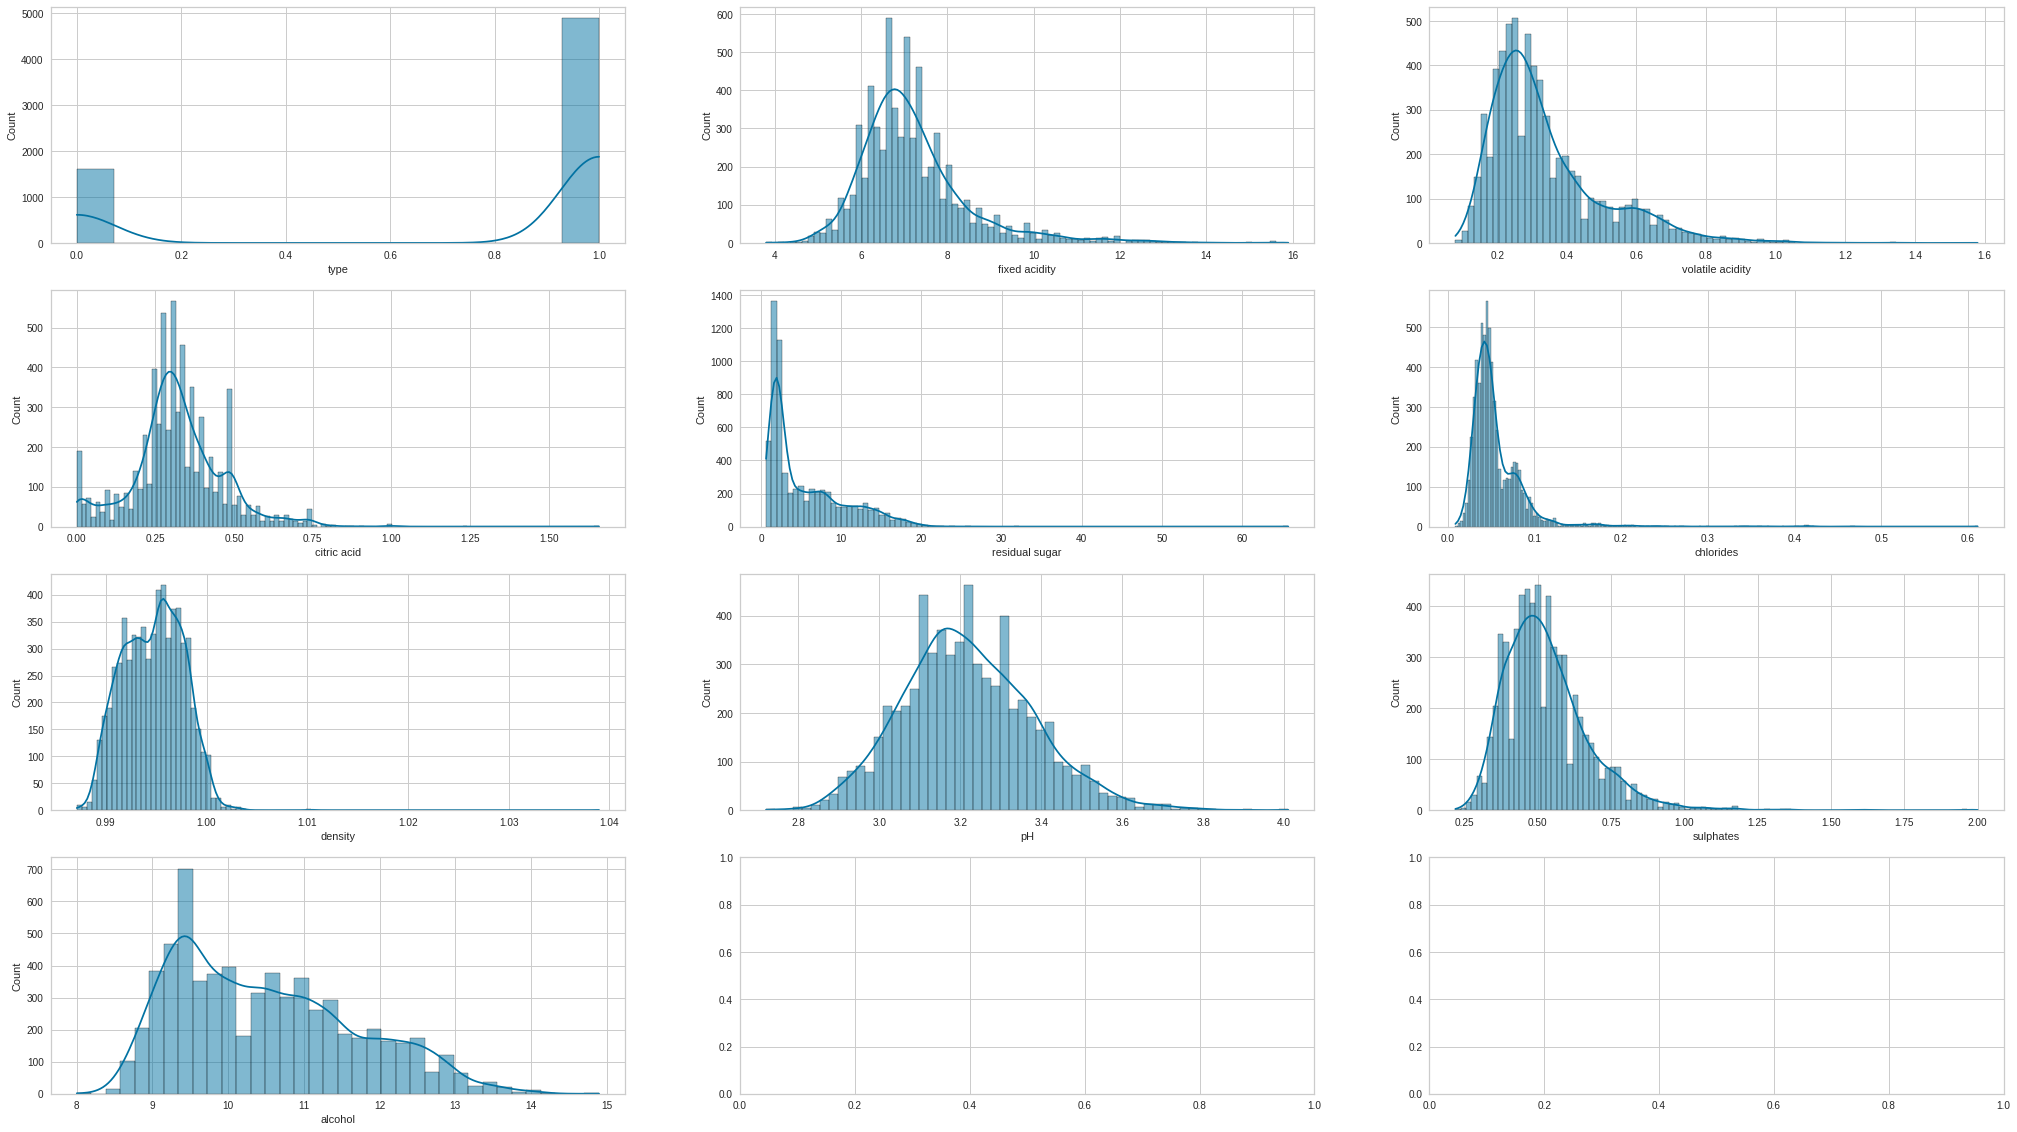

In [65]:
plot , ax = plt.subplots( 4,3 , figsize = (35 , 20))
g = sns.histplot(Chateau_Montelena_AutoML['type'] , kde = True , ax = ax[0][0])
g = sns.histplot(Chateau_Montelena_AutoML['fixed acidity'] , kde = True , ax = ax[0][1])
g = sns.histplot(Chateau_Montelena_AutoML['volatile acidity'] , kde = True , ax = ax[0][2])
g = sns.histplot(Chateau_Montelena_AutoML['citric acid'] , kde = True , ax = ax[1][0])
g = sns.histplot(Chateau_Montelena_AutoML['residual sugar'] , kde = True , ax = ax[1][1])
g = sns.histplot(Chateau_Montelena_AutoML['chlorides'] , kde = True , ax = ax[1][2])
g = sns.histplot(Chateau_Montelena_AutoML['density'] , kde = True , ax = ax[2][0])
g = sns.histplot(Chateau_Montelena_AutoML['pH'] , kde = True , ax = ax[2][1])
g = sns.histplot(Chateau_Montelena_AutoML['sulphates'] , kde = True , ax = ax[2][2])
g = sns.histplot(Chateau_Montelena_AutoML['alcohol'] , kde = True , ax = ax[3][0])

Observation :

These numerical variables are not following a normal distribution. These distributions indicate there are different data distributions present in population data with separate and independent peaks.

Action :

Data scaling, As most of the algorithms assume the data to be normally (Gaussian) distributed we Normalize these features.

In [66]:
Chateau_Montelena_AutoML.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


##Outliers

In [67]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
# cust_dummies=pd.get_dummies(cust)
Chateau_Montelena_AutoML_copy['type'] = mms.fit_transform(Chateau_Montelena_AutoML_copy[['type']])
Chateau_Montelena_AutoML_copy['fixed acidity'] = mms.fit_transform(Chateau_Montelena_AutoML_copy[['fixed acidity']])
Chateau_Montelena_AutoML_copy['volatile acidity'] = mms.fit_transform(Chateau_Montelena_AutoML_copy[['volatile acidity']])
Chateau_Montelena_AutoML_copy['citric acid']= mms.fit_transform(Chateau_Montelena_AutoML_copy[['citric acid']])
Chateau_Montelena_AutoML_copy['residual sugar']= mms.fit_transform(Chateau_Montelena_AutoML_copy[['residual sugar']])
Chateau_Montelena_AutoML_copy['chlorides']= mms.fit_transform(Chateau_Montelena_AutoML_copy[['chlorides']])
# Chateau_Montelena_AutoML_copy['free sulphur dioxide']= mms.fit_transform(Chateau_Montelena_AutoML_copy[['free sulphur dioxide']]) 
# Chateau_Montelena_AutoML_copy['total sulphur dioxide']= mms.fit_transform(Chateau_Montelena_AutoML_copy[['total sulphur dioxide']])
Chateau_Montelena_AutoML_copy['density'] = mms.fit_transform(Chateau_Montelena_AutoML_copy[['density']])
Chateau_Montelena_AutoML_copy['pH'] = mms.fit_transform(Chateau_Montelena_AutoML_copy[['pH']])
Chateau_Montelena_AutoML_copy['sulphates'] = mms.fit_transform(Chateau_Montelena_AutoML_copy[['sulphates']])
Chateau_Montelena_AutoML_copy['alcohol'] = mms.fit_transform(Chateau_Montelena_AutoML_copy[['alcohol']])

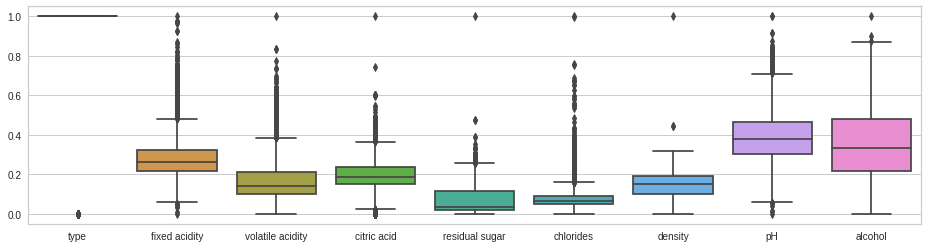

In [68]:
plt.figure(figsize=(16,4))
sns.boxplot(data=Chateau_Montelena_AutoML_copy[['type','fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','density','pH','alcohol']])

Observation : There are values present beyond the upper and lower extremes of the Box plots (1.5 x Inter Quartile Range)

##Multicolinearity

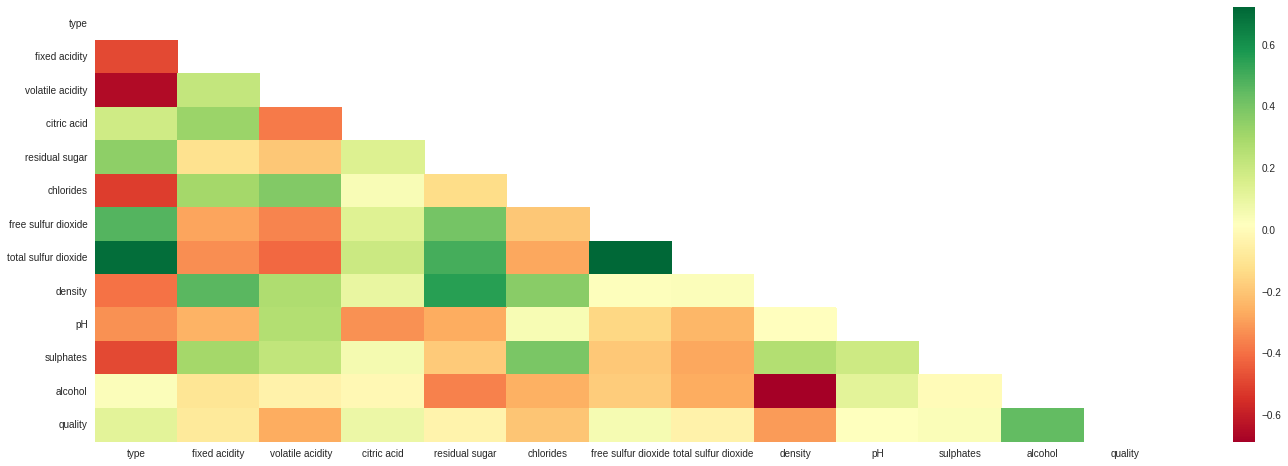

In [69]:
plt.figure(figsize=(24,8))
corr = Chateau_Montelena_AutoML_copy.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr,mask=mask, cmap='RdYlGn')

**Observation :**

By looking at the correlation mattrix above we can gain the following insights:

* volatile acidity and chlorides is highly (-ve) correlated with type.
* alcohol is highly (-ve) correlated with density.
* total sulpher dioxide is highly (+ve) correlated with type.

**Action :**

Dropping some of the highly correlated categorical variables.

##Regression
* Target Variable = Quality between 3-9

In [70]:
from pycaret.regression import *
s = setup(Chateau_Montelena_AutoML, target = 'quality',train_size=0.8,
             normalize=True,
             normalize_method='minmax',
             remove_multicollinearity=True,
             remove_outliers=True,
             fold=5,
             silent = True)

,Description,Value
0,session_id,3185
1,Target,quality
2,Original Data,"(6497, 13)"
3,Missing Values,True
4,Numeric Features,12
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(4937, 12)"


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='quality',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strateg...
                ('dummy', Dummify(target='quality')),
                ('fix_perfect', Remove_100(target='quality')),
                ('clean_names', Clean_Colum_Names()),
                ('feature_select', 'passt

In [71]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.3995,0.3486,0.5899,0.5236,0.0887,0.0715,1.094
rf,Random Forest Regressor,0.4455,0.3672,0.6055,0.4982,0.0910,0.0795,2.088
lightgbm,Light Gradient Boosting Machine,0.4858,0.4017,0.6335,0.4507,0.0946,0.0861,0.276
gbr,Gradient Boosting Regressor,0.5284,0.4538,0.6734,0.3794,0.1001,0.0934,0.620
knn,K Neighbors Regressor,0.5285,0.4893,0.6990,0.3314,0.1040,0.0937,0.084
lr,Linear Regression,0.5596,0.5114,0.7149,0.3004,0.1060,0.0988,0.682
lar,Least Angle Regression,0.5596,0.5114,0.7149,0.3004,0.1060,0.0988,0.022
br,Bayesian Ridge,0.5596,0.5117,0.7151,0.3000,0.1060,0.0989,0.022
huber,Huber Regressor,0.5589,0.5126,0.7157,0.2988,0.1060,0.0984,0.106
ridge,Ridge Regression,0.5615,0.5155,0.7177,0.2948,0.1064,0.0992,0.018


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 2
INFO:logs:ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=3185, verbose=0, warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


Tuning the best model here i.e. Extra Trees Regressor

In [72]:
tuned_model = tune_model(best)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.5968,0.5795,0.7612,0.2004,0.1121,0.1056
1,0.5973,0.5634,0.7506,0.2070,0.1121,0.1075
2,0.6291,0.6265,0.7915,0.1843,0.1180,0.1123
3,0.5876,0.5388,0.7340,0.2195,0.1089,0.1043
4,0.5977,0.5959,0.7719,0.2180,0.1142,0.1065
Mean,0.6017,0.5808,0.7619,0.2058,0.1131,0.1072
Std,0.0142,0.0296,0.0194,0.0129,0.0030,0.0027


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 3
INFO:logs:ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=6, max_features='sqrt', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.001,
                    min_impurity_split=None, min_samples_leaf=4,
                    min_samples_split=7, min_weight_fraction_leaf=0.0,
                    n_estimators=180, n_jobs=-1, oob_score=False,
                    random_state=3185, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [73]:
#Creating Models
lightgbm  = create_model('lightgbm');       
et  = create_model('et');          
rf  = create_model('rf'); 

#Blending the top 3 models
blend = blend_models(estimator_list=[lightgbm,et,rf])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4438,0.3633,0.6028,0.4987,0.0894,0.0784
1,0.4132,0.3137,0.5601,0.5584,0.0851,0.0746
2,0.4506,0.3838,0.6195,0.5003,0.0936,0.0805
3,0.4376,0.3411,0.5841,0.5059,0.0876,0.0776
4,0.4461,0.3735,0.6112,0.5098,0.0913,0.0795
Mean,0.4383,0.3551,0.5955,0.5146,0.0894,0.0781
Std,0.0132,0.0251,0.0213,0.0222,0.0029,0.0020


INFO:logs:create_model_container: 23
INFO:logs:master_model_container: 23
INFO:logs:display_container: 7
INFO:logs:VotingRegressor(estimators=[('lightgbm',
                             LGBMRegressor(boosting_type='gbdt',
                                           class_weight=None,
                                           colsample_bytree=1.0,
                                           importance_type='split',
                                           learning_rate=0.1, max_depth=-1,
                                           min_child_samples=20,
                                           min_child_weight=0.001,
                                           min_split_gain=0.0, n_estimators=100,
                                           n_jobs=-1, num_leaves=31,
                                           objective=None, random_state=3185,
                                           reg_alpha=0.0, reg_lambda=0.0,
                                           silent='warn', s...
           

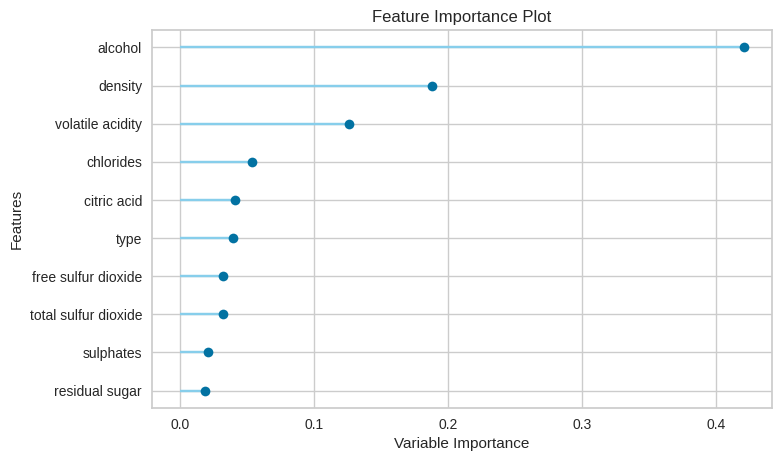

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [74]:
plot_model(estimator = tuned_model, plot = 'feature')

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=6, max_features='sqrt', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.001,
                    min_impurity_split=None, min_samples_leaf=4,
                    min_samples_split=7, min_weight_fraction_leaf=0.0,
                    n_estimators=180, n_jobs=-1, oob_score=False,
                    random_state=3185, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=summary, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: summary
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


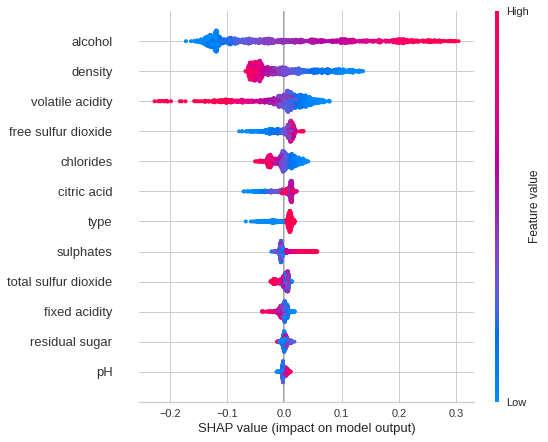

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [75]:
interpret_model(tuned_model)

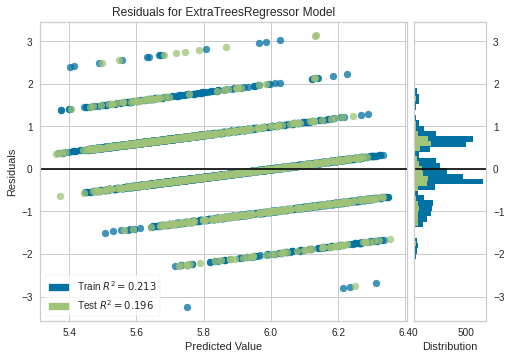

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [76]:
plot_model(estimator = tuned_model, plot = 'residuals')

Observation : The residuals are evenly distributed and the line fits well.

## Answers for Regression Model
* Is the relationship significant?

-> Yes, we can accurately predict the Wine Quality with minimum deviations with the Atrributes provided.

---

* Are any model assumptions violated?

-> We have used the Pycaret library for the avoiding any model violation
1.   Normalized the numeric predictor variables
2.   Transformed the target variable using Box Cox transformation.
3.   Adjust the train test split to ensure sufficient training and test data size
4.   Use 5 fold cross validation to eliminate any test set bias.
5.   Remove multicolinearity from the model.



---



* Is there any multicollinearity in the model?

-> Yes, multicolinearity exists in the data.



---



* In the multivariate models are predictor variables independent of all the other predictor variables?

-> In the data, predictor variables are depedent on each other.
We use remove_multicolinearity to eliminate the highly corelated predictor variables



---



* In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.

-> The most significant predictor variables are as follows:
1. Alcohol
2. Volatile Acidity
3. Citric Acid
4. Residual sugar
5. Density

->  To eliminate insignificant features from the model we use feature selection while setting up the Pycaret model. 

---

* Does the model make sense?

-> Yes, the wine quality prediction model makes sense as it has this accuracy and are able to correctly classify and predict the wine quality.


---


* Does regularization help?

-> Yes regularization reduced the mae value.

---


* Which independent variables are significant?

->  Alcohol,Volatile Acidity,Citric Acid,Residual sugar,Density are important independent variable for predicting the Monthly Charges.

---


* Which hyperparameters are important?

->The number of estimators, bagging fraction, bagging frequency, regularization parameters alpha and lambda are important hyperparameters



##Binary classification
* Target Variable = Quality- Low or High

In [77]:
from pycaret.classification import *

# Categorization of Quality 

In [78]:
quality_mapping = { 3 : 'Low', 4 : 'Low', 5: 'Low', 6 : 'High', 7: 'High', 8 : 'High', 9 : 'High'}
Chateau_Montelena_AutoMLB['quality'] =  Chateau_Montelena_AutoMLB['quality'].map(quality_mapping)

In [79]:
print("Wine Quality(%):")
print(round(Chateau_Montelena_AutoMLB['quality'].value_counts(normalize=True) * 100,2))

Wine Quality(%):
High    63.31
Low     36.69
Name: quality, dtype: float64


#Classifier Setup

In [80]:
clfb = setup(data = Chateau_Montelena_AutoMLB, 
             target = 'quality',
            #  ignore_features = ['customerID'],
             train_size=0.8,
             normalize=True,
             normalize_method='minmax',
             fix_imbalance=True,
             remove_multicollinearity=True,
             remove_outliers=True,
             fold=5,
             silent = True)

,Description,Value
0,session_id,437
1,Target,quality
2,Target Type,Binary
3,Label Encoded,"High: 0, Low: 1"
4,Original Data,"(6497, 13)"
5,Missing Values,True
6,Numeric Features,11
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='quality',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_str...
                ('dummy', Dummify(target='quality')),
                ('fix_perfect', Remove_100(target='quality')),
                ('clean_names', Clean_Colum_Names()),
   

## Evaluation Metrics

Pycaret provides the following metrics used for comparing model performance in the compare_models() function:

* **Confusion Matrix** is a performance measurement for machine learning classification problem where output can be two or more classes. It is a table with 4 different combinations of predicted and actual values.

* **AUC** known as the Area Under the ROC Curve can be calculated and provides a single score to summarize the plot that can be used to compare models. A no skill classifier will have a score of 0.5, whereas a perfect classifier will have a score of 1.0.

* **F1 score** is the harmonic mean of Precision and recall, a single score that seeks to balance both concerns.

* **Accuracy** is the fraction of correction predictions against the total prediction
    * Accuracy = Correct Predictions / Total Predictions

* **MCC** produces a high score only if the prediction obtained good results in all of the four confusion matrix categories (true positives, false negatives, true negatives, and false positives), proportionally both to the size of positive elements and the size of negative elements in the dataset.

* **Precision** summarizes the fraction of examples assigned the positive class that belong to the positive class.
    * Precision = TruePositive / (TruePositive + FalsePositive)

* **Cohen’s Kappa Statistic** is used to measure the level of agreement between two raters or judges who each classify items into mutually exclusive categories.
    * kappa = (Observed agreement - chance agreement) / (1-chance agreement)
    
* **Recall** summarizes how well the positive class was predicted.
    * Recall = TruePositive / (TruePositive + FalseNegative)

    * F-Measure = (2 * Precision * Recall) / (Precision + Recall)




## Model Comparison & Evaluation
Searching for the best models

In [81]:
best_modelB=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8207,0.8990,0.7478,0.7544,0.7502,0.6105,0.6114,0.916
rf,Random Forest Classifier,0.8185,0.8913,0.7607,0.7428,0.7512,0.6084,0.6090,1.250
lightgbm,Light Gradient Boosting Machine,0.7981,0.8652,0.7511,0.7072,0.7283,0.5678,0.5688,0.236
gbc,Gradient Boosting Classifier,0.7608,0.8360,0.7449,0.6460,0.6918,0.4980,0.5015,1.088
dt,Decision Tree Classifier,0.7569,0.7421,0.6888,0.6550,0.6709,0.4785,0.4795,0.092
knn,K Neighbors Classifier,0.7369,0.8073,0.7393,0.6120,0.6694,0.4541,0.4601,0.234
ada,Ada Boost Classifier,0.7320,0.8047,0.7438,0.6044,0.6668,0.4467,0.4535,0.376
lda,Linear Discriminant Analysis,0.7268,0.8000,0.7629,0.5944,0.6681,0.4419,0.4521,0.064
ridge,Ridge Classifier,0.7245,0.0000,0.7562,0.5925,0.6643,0.4365,0.4461,0.052
qda,Quadratic Discriminant Analysis,0.7215,0.7970,0.7152,0.5946,0.6492,0.4215,0.4266,0.056


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=437, verbose=0,
                     warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


## Hyperparameter Tuning

In [82]:
tuned_modelB = tune_model(best_modelB)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6731,0.7456,0.7107,0.5349,0.6104,0.3383,0.3485
1,0.7024,0.7868,0.7781,0.5630,0.6533,0.4042,0.4205
2,0.6819,0.7709,0.7388,0.5434,0.6262,0.3603,0.3732
3,0.7011,0.7830,0.7247,0.5670,0.6363,0.3889,0.3974
4,0.6910,0.7646,0.7612,0.5519,0.6399,0.3811,0.3963
Mean,0.6899,0.7702,0.7427,0.5520,0.6332,0.3746,0.3872
Std,0.0112,0.0147,0.0243,0.0120,0.0143,0.0230,0.0245


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:ExtraTreesClassifier(bootstrap=True, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='entropy',
                     max_depth=11, max_features='log2', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.005,
                     min_impurity_split=None, min_samples_leaf=6,
                     min_samples_split=10, min_weight_fraction_leaf=0.0,
                     n_estimators=20, n_jobs=-1, oob_score=False,
                     random_state=437, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


## Creating a model 
We will use Light GBM , Extra Trees Classifier, Random Forest Classifier model here, as these perform the best.

In [83]:
#Creating Models
lightgbmB  = create_model('lightgbm');       
etB  = create_model('et');          
rfB  = create_model('rf'); 

#Blending the top 3 models
blendB = blend_models(estimator_list=[lightgbmB,etB,rfB])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8289,0.8960,0.7584,0.7649,0.7616,0.6283,0.6283
1,0.8148,0.9004,0.8062,0.7157,0.7583,0.6090,0.6118
2,0.8237,0.8967,0.7809,0.7433,0.7616,0.6219,0.6224
3,0.8065,0.8922,0.7219,0.7364,0.7291,0.5786,0.5787
4,0.8217,0.8901,0.7331,0.7632,0.7479,0.6100,0.6103
Mean,0.8191,0.8951,0.7601,0.7447,0.7517,0.6095,0.6103
Std,0.0078,0.0036,0.0308,0.0182,0.0124,0.0171,0.0172


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 7
INFO:logs:VotingClassifier(estimators=[('lightgbm',
                              LGBMClassifier(boosting_type='gbdt',
                                             class_weight=None,
                                             colsample_bytree=1.0,
                                             importance_type='split',
                                             learning_rate=0.1, max_depth=-1,
                                             min_child_samples=20,
                                             min_child_weight=0.001,
                                             min_split_gain=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             num_leaves=31, objective=None,
                                             random_state=437, reg_alpha=0.0,
                                             reg_lambda=0.0, silent=

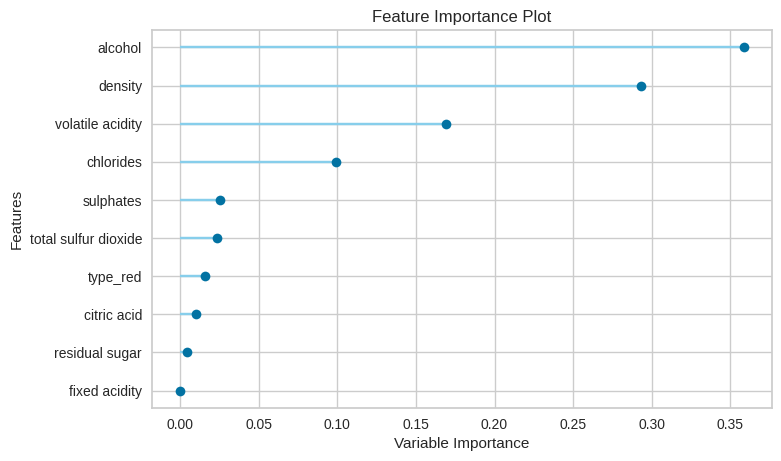

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [84]:
plot_model(estimator = tuned_modelB, plot = 'feature')

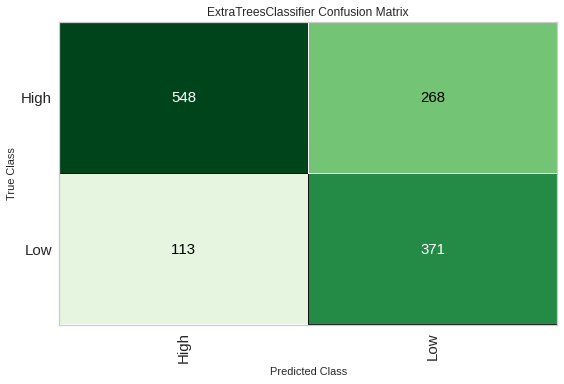

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [85]:
#Plotting the confusion Matrix
plot_model(estimator = tuned_modelB, plot = 'confusion_matrix')

**Observation :**

We can see a strong diagnol indicating good predictions.

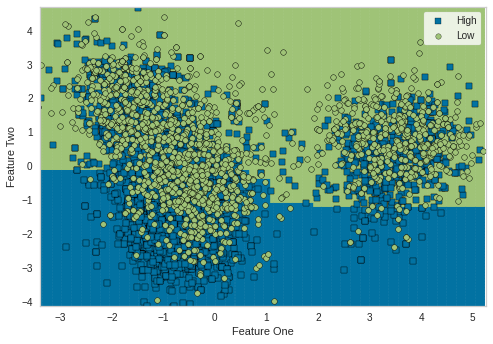

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [86]:
#plotting decision boundary
plot_model(estimator = tuned_modelB, plot = 'boundary', use_train_data = True)

**Observation:** 

We can see a great seperation with very few misclassifications.

In [87]:
plot_model(tuned_modelB, plot = 'parameter')

,Parameters
bootstrap,True
ccp_alpha,0.0
class_weight,balanced_subsample
criterion,entropy
max_depth,11
max_features,log2
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.005
min_impurity_split,None


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


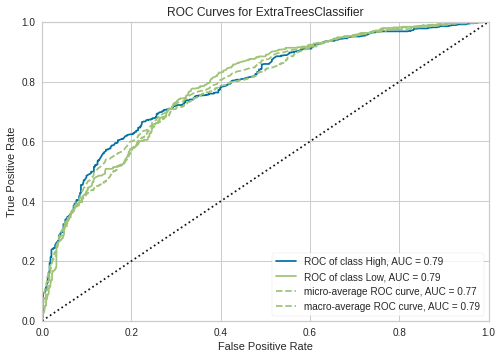

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [88]:
#Plotting Area under Curve
plot_model(estimator = tuned_modelB, plot = 'auc')

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=ExtraTreesClassifier(bootstrap=True, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='entropy',
                     max_depth=11, max_features='log2', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.005,
                     min_impurity_split=None, min_samples_leaf=6,
                     min_samples_split=10, min_weight_fraction_leaf=0.0,
                     n_estimators=20, n_jobs=-1, oob_score=False,
                     random_state=437, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=summary, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: summary
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


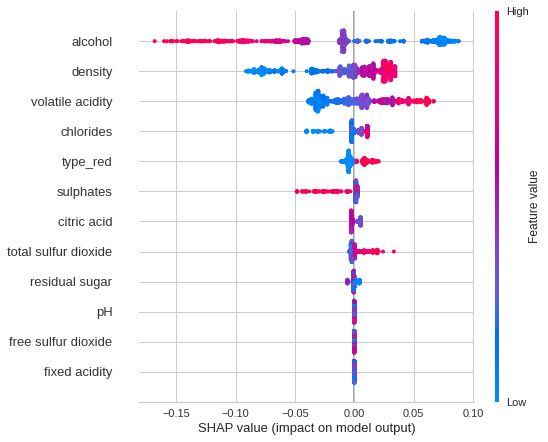

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [89]:
interpret_model(tuned_modelB)

## Answers to Model used for Binary Classification
* Is the relationship significant?

-> Yes, the relastionship between Alcohol, Density, Volatile Acidity, Sulphates, Free Sulphur Dioxide are significantly important for predicting wine quality.

---

* Are any model assumptions violated?

-> We have used the Pycaret library for the avoiding any model violation
1.   Normalized the numeric predictor variables
2.   Transformed the target variable using Box Cox transformation.
3.   Adjust the train test split to ensure sufficient training and test data size
4.   Use 5 fold cross validation to eliminate any test set bias.
5.   Remove multicolinearity from the model.

---


* Is there any multicollinearity in the model?

-> Yes, multicolinearity exists in the data.
* volatile acidity and chlorides is highly (-ve) correlated with type.
* alcohol is highly (-ve) correlated with density.
* total sulpher dioxide is highly (+ve) correlated with type.

---

* In the multivariate models are predictor variables independent of all the other predictor variables?

-> In the data, predictor variables are depedent on each other.
We use remove_multicolinearity to eliminate the highly corelated predictor variables.

---

* In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.

-> The most important features are Alcohol, Density, Volatile Acidity, Sulphates, Free Sulphur Dioxide.

We have exluded the insignificant ones by setting Remove perfect colinearity, remove multicolinearity and feature selection to True.

---

* Does the model make sense?

-> Yes, the wine quality prediction model makes sense as it has this accuracy and are able to correctly classify and predict the Quality bucket.

---

* Does regularization help?

-> No, regularization decreased the F1 score of the Extra Trees Classifier model signficantly from 0.7594 to 0.7088.

---

* Which independent variables are significant?

-> Alcohol, Density, Volatile Acidity, Sulphates, Free Sulphur Dioxide.

---

* Which hyperparameters are important?

->The number of estimators, min_samples_leaf, min_samples_split, max_depth etc are important hyperparameters


##Multivariate classification
* Target Variable = Quality - Low,Medium,High

In [90]:
#from pycaret.classification import *

##Classification of Quality

In [91]:
quality_mappingM = { 3 : 'Low', 4 : 'Low', 5: 'Medium', 6 : 'Medium', 7: 'Medium', 8 : 'High', 9 : 'High'}
Chateau_Montelena_AutoMLM['quality'] =  Chateau_Montelena_AutoMLM['quality'].map(quality_mappingM)

##Distribution

In [92]:

print("Wine Quality(%):")
print(round(Chateau_Montelena_AutoMLM['quality'].value_counts(normalize=True) * 100,2))

Wine Quality(%):
Medium    93.17
Low        3.79
High       3.05
Name: quality, dtype: float64


##Setting the classifier

In [93]:
clfM = setup(data = Chateau_Montelena_AutoMLM, 
             target = 'quality',
            #  ignore_features = ['customerID'],
             train_size=0.8,
             normalize=True,
             normalize_method='minmax',
             fix_imbalance=True,
             remove_multicollinearity=True,
             remove_outliers=True,
             fold=5,
             silent = True)

,Description,Value
0,session_id,6561
1,Target,quality
2,Target Type,Multiclass
3,Label Encoded,"High: 0, Low: 1, Medium: 2"
4,Original Data,"(6497, 13)"
5,Missing Values,True
6,Numeric Features,11
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='quality',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_str...
                ('dummy', Dummify(target='quality')),
                ('fix_perfect', Remove_100(target='quality')),
                ('clean_names', Clean_Colum_Names()),
   

In [94]:
best_modelM=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9249,0.7643,0.5341,0.9159,0.9197,0.3286,0.3328,0.812
et,Extra Trees Classifier,0.9190,0.8278,0.5611,0.9166,0.9176,0.3383,0.3393,1.102
rf,Random Forest Classifier,0.9105,0.8099,0.5640,0.9139,0.9119,0.3204,0.3212,2.570
dt,Decision Tree Classifier,0.8477,0.6483,0.5629,0.9039,0.8717,0.2085,0.2263,0.174
gbc,Gradient Boosting Classifier,0.7825,0.7222,0.6079,0.9058,0.8311,0.1778,0.2183,9.612
knn,K Neighbors Classifier,0.7460,0.7133,0.6245,0.9083,0.8076,0.1649,0.2168,0.262
ada,Ada Boost Classifier,0.5599,0.5988,0.5772,0.8985,0.6677,0.0766,0.1326,0.862
qda,Quadratic Discriminant Analysis,0.5208,0.6564,0.5713,0.8978,0.6344,0.0675,0.1242,0.044
lda,Linear Discriminant Analysis,0.5084,0.7144,0.6293,0.9064,0.6211,0.0818,0.1552,0.050
lr,Logistic Regression,0.4877,0.7095,0.6237,0.9078,0.6024,0.0783,0.1527,0.604


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=6561, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:compare_models() succesfully completed......................................


LGBM has the best F1 score and is faster than the other top models.

In [95]:
tuned_modelM = tune_model(best_modelM)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9099,0.7690,0.5685,0.9151,0.9124,0.3287,0.3293
1,0.9049,0.7446,0.4888,0.9021,0.9035,0.2282,0.2283
2,0.9108,0.7676,0.6028,0.9194,0.9147,0.3539,0.3559
3,0.9108,0.7513,0.5299,0.9099,0.9103,0.2879,0.2880
4,0.9159,0.7703,0.5220,0.9105,0.9130,0.2923,0.2932
Mean,0.9105,0.7606,0.5424,0.9114,0.9108,0.2982,0.2989
Std,0.0035,0.0105,0.0394,0.0058,0.0039,0.0426,0.0432


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:LGBMClassifier(bagging_fraction=0.7, bagging_freq=7, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.8,
               importance_type='split', learning_rate=0.4, max_depth=-1,
               min_child_samples=71, min_child_weight=0.001, min_split_gain=0.5,
               n_estimators=20, n_jobs=-1, num_leaves=200, objective=None,
               random_state=6561, reg_alpha=0.3, reg_lambda=0.4, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:tune_model() succesfully completed......................................


Observation : By tuning the regularization parameters alpha(Value:0.5) and lambda(Value:10), the F1 score has falls from 0.9244 to 0.9207

In [96]:
#Creating Models
lightgbmM  = create_model('lightgbm');       
etM  = create_model('et');          
rfM  = create_model('rf'); 

#Blending the top 3 models
blendM = blend_models(estimator_list=[lightgbmM,etM,rfM])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9261,0.8423,0.5743,0.9214,0.9236,0.3823,0.3832
1,0.9241,0.7903,0.4859,0.9096,0.9155,0.2711,0.2795
2,0.9260,0.8258,0.6189,0.9259,0.9259,0.4136,0.4136
3,0.9210,0.8000,0.5043,0.9108,0.9154,0.2915,0.2950
4,0.9372,0.8548,0.5977,0.9304,0.9331,0.4414,0.4460
Mean,0.9269,0.8226,0.5562,0.9196,0.9227,0.3600,0.3635
Std,0.0055,0.0245,0.0522,0.0082,0.0067,0.0672,0.0655


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 7
INFO:logs:VotingClassifier(estimators=[('lightgbm',
                              LGBMClassifier(boosting_type='gbdt',
                                             class_weight=None,
                                             colsample_bytree=1.0,
                                             importance_type='split',
                                             learning_rate=0.1, max_depth=-1,
                                             min_child_samples=20,
                                             min_child_weight=0.001,
                                             min_split_gain=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             num_leaves=31, objective=None,
                                             random_state=6561, reg_alpha=0.0,
                                             reg_lambda=0.0, silent

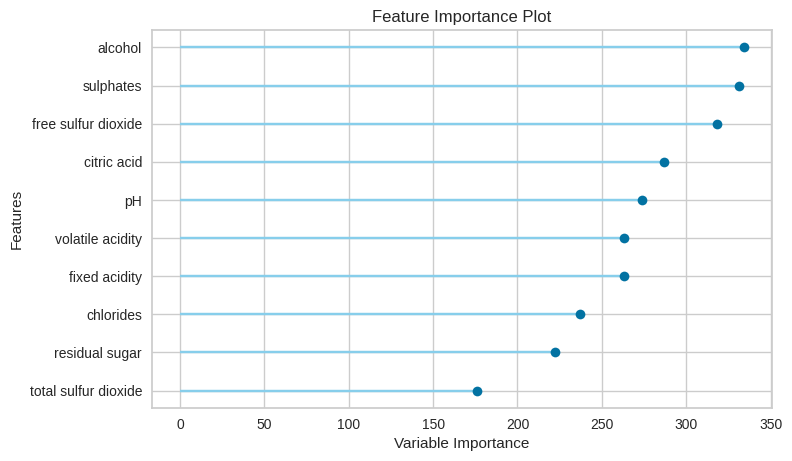

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [97]:
plot_model(estimator = tuned_modelM, plot = 'feature')

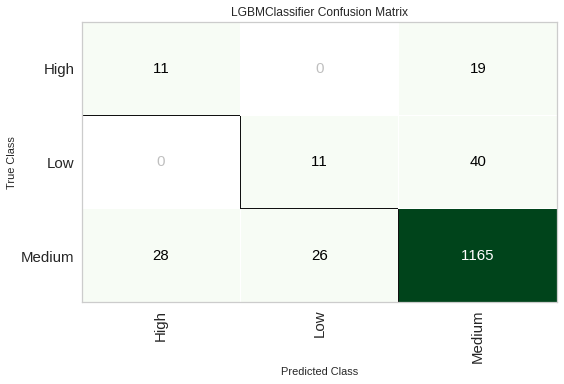

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [98]:
#Plotting the confusion Matrix
plot_model(estimator = tuned_modelM, plot = 'confusion_matrix')

**Observation :**

We can see a strong diagnol indicating good predictions.

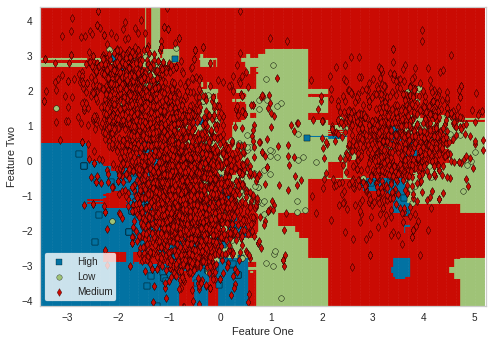

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [99]:
#plotting decision boundary
plot_model(estimator = tuned_modelM, plot = 'boundary', use_train_data = True)

**Observation :**
we can see a good seperation between classes with minimal mis-classifications

In [100]:
plot_model(tuned_modelM, plot = 'parameter')

,Parameters
boosting_type,gbdt
class_weight,None
colsample_bytree,1.0
importance_type,split
learning_rate,0.4
max_depth,-1
min_child_samples,71
min_child_weight,0.001
min_split_gain,0.5
n_estimators,20


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


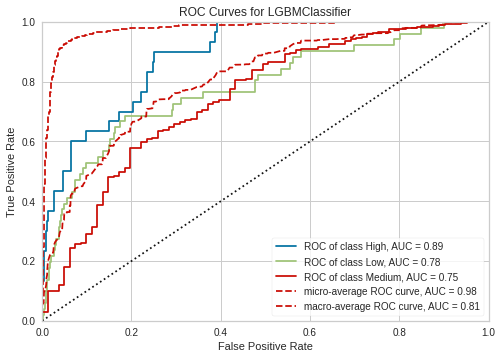

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [101]:
#Plotting Area under Curve
plot_model(estimator = tuned_modelM, plot = 'auc')

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=LGBMClassifier(bagging_fraction=0.7, bagging_freq=7, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.8,
               importance_type='split', learning_rate=0.4, max_depth=-1,
               min_child_samples=71, min_child_weight=0.001, min_split_gain=0.5,
               n_estimators=20, n_jobs=-1, num_leaves=200, objective=None,
               random_state=6561, reg_alpha=0.3, reg_lambda=0.4, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=summary, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: summary
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


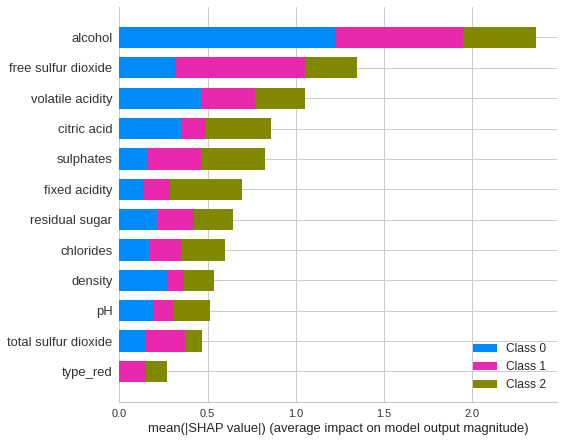

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [102]:
interpret_model(tuned_modelM)

## Answers to Model used for Binary Classification
* Is the relationship significant?

-> Yes, the relastionship between Alcohol, Volatile Acidity, Sulphates, Fixed Acidity, pH are significantly important for predicting wine quality.

---

* Are any model assumptions violated?

-> We have used the Pycaret library for the avoiding any model violation
1.   Normalized the numeric predictor variables
2.   Transformed the target variable using Box Cox transformation.
3.   Adjust the train test split to ensure sufficient training and test data size
4.   Use 5 fold cross validation to eliminate any test set bias.
5.   Remove multicolinearity from the model.

---


* Is there any multicollinearity in the model?

-> Yes, multicolinearity exists in the data.
* volatile acidity and chlorides is highly (-ve) correlated with type.
* alcohol is highly (-ve) correlated with density.
* total sulpher dioxide is highly (+ve) correlated with type.

---

* In the multivariate models are predictor variables independent of all the other predictor variables?

-> In the data, predictor variables are depedent on each other.
We use remove_multicolinearity to eliminate the highly corelated predictor variables.

---

* In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.

-> The most important features are Alcohol, Volatile Acidity, Sulphates, Fixed Acidity, pH.

We have exluded the insignificant ones by setting Remove perfect colinearity, remove multicolinearity and feature selection to True.

---

* Does the model make sense?

-> Yes, the wine quality prediction model makes sense as it has this accuracy and are able to correctly classify and predict the Quality bucket.

---

* Does regularization help?

-> No, regularization decreased the F1 score of the LGBM model from 0.9244 to 0.9204.

---

* Which independent variables are significant?

-> Alcohol, Volatile Acidity, Sulphates, Fixed Acidity, pH.

---

* Which hyperparameters are important?

->The number of estimators, regularization parameters alpha and lambda, etc are important hyperparameters.


# Conclusion:

* Several **data preprocessing and preparation** exercises like imputing missing values, handling outliers, standardizing/normalizing variables, one-hot/ordinal/cardinal encoding, target imbalance and feature selection are provided by PyCaret.
* It provides a robust framework not only to **build multiple ML models** but also evaluate them using a wide set of metrics.
* It offers visuals/plots to **evaluate the model performance** as well as interpret the models.
* We can also perform **hyperparameter tuning** and **blend multiple models** to attain highly accuracte models.

# License

**References*** 
* https://pycaret.org
* https://pycaret.readthedocs.io/en/stable/api/classification.html

Copyright (c) 2022 indoriarishabh25

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.